# Computer Vision 2024 Assignment 3: Deep Learning for Perception Tasks

This assignment contains 2 questions. The first question probes understanding of deep learning for classification. The second question is a more challenging classification experiment on a larger dataset. Answer the questions in separate Python notebooks.

## Question 1: A simple classifier, 20 marks

For this exercise, we provide demo code showing how to train a network on a small dataset called [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). Please run through the code "tutorial-style" to get a sense of what it is doing. Then use the code alongside lecture notes and other resources to understand how to use pytorch libraries to implement, train and use a neural network.

For the Fashion-MNIST dataset the lables from 0-9 correspond to various clothing classes so you might find it convenient to create a python list as follows:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

You will need to answer various questions about the system, how it operates, the results of experiments with it and make modifications to it yourself. You can change the training scheme and the network structure. 

Organize your own text and code cell to show the answer of each questions.

Detailed requirements:

**Q1.1 (1 point)**

Extract 3 images of different types of clothing from the training dataset, print out the size/shape of the training images, and display the three with their corresponding labels. 

**Q1.2 (2 points)** 

Run the training code for 10 epochs, for different values of the learning rate. Fill in the table below and plot the loss curves for each experiment:

|Lr|Accuracy|
|---|---|
|1   |      |
|0.1|          |
|0.01|         ||
|0.001  |        |


**Q1.3 (3 points)** 

Report the number of epochs when the accuracy reaches 85%. Fill in the table below and plot the loass curve for each experiment:

|Lr|Accuracy|Epoch|
|---|---|---|
|1   |      |     |
|0.1|          |    |
|0.01|         |    |
|0.001  |        |     |


**Q1.4 (2 points)** 

Compare the results in table 1 and table 2, what is your observation and your understanding of learning rate?


**Q1.5 (5 points)** 

Build a wider network by modifying the code that constructs the network so that the hidden layer(s) contain more perceptrons, and record the accuracy along with the number of trainable parameters in your model.  Now modify the oroginal network to be deeper instead of wider (i.e. by adding more hidden layers). Record your accuracy and network size findings. Plot the loss curve for each experiment. Write down your conclusions about changing the network structure?  

|Structures|Accuracy|Parameters|
|---|---|---|
|Base   |      ||
|Deeper|          ||
|Wider|         ||


**Q1.6 (2 points)** 

Calculate the mean of the gradients of the loss to all trainable parameters. Plot the gradients curve for the first 100 training steps. What are your observations? Note that this gradients will be saved with the training weight automatically after you call loss.backwards(). Hint: the mean of the gradients decrease.

For more exlanation of q1.7, you could refer to the following simple instructions: https://colab.research.google.com/drive/1XAsyNegGSvMf3_B6MrsXht7-fHqtJ7OW?usp=sharing

**Q1.7 (5 points)** 

Modify the network structure and training/test to use a small convolutional neural network instead of an MLP. Discuss your findings with rehgard to convergence, accuracy and number of parameters, relative to MLPs.  

Hint: Look at the structure of the CNN in the Workshop 3 examples.

Add in a code cell to inspect the training data, as per Q1.1. Each element of the training_data structure has a greyscale image (which you can use plt.imshow(img[0,:,:]) to display, just like you did in previous assignments.  

In [1]:
import numpy as np # This is for mathematical operations

# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
#### Tutorial Code
####PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. 
#####Dataset stores samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

# Download training data from open datasets. 
##Every TorchVision Dataset includes two arguments: 
##transform and target_transform to modify the samples and labels respectively.

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

**NOTE**: For consistency with the original data set, we call our validation data "test_data". It is important to keep in mind though that we are using the data for model validation and not for testing the final, trained model (which requires data not used when training the model parameters). 

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset and supports automatic batching, sampling, shuffling, and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

**Q1.1**

- Extract 3 images of different types of clothing from the training dataset
- Print out the size/shape of the training images, and display the three with their corresponding labels. 


Image label Ankle boot: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000,

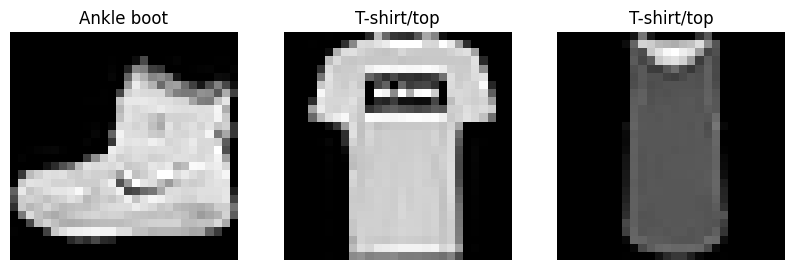

In [3]:
# Select 3 images of different types of clothing

indices = [0,1,2]

images, lables = zip(*(training_data[i] for i in indices)) # Return 2 tuples

# Get the size/shape of images

image_shape = (image.shape for image in images)

# Print the shapes of the selecyed images
# Define class name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

label_shape = zip(lables, images)

for label, shape in label_shape:
    print(f'Image label {class_names[label]}: {shape}')
    print("\n") # For better visualization


# Display the three images with their corresponding labels
plt.figure(figsize=(10, 3))
for i, (image, label) in enumerate(zip(images, lables)):
    plt.subplot(1,3,i + 1)
    plt.title(class_names[label])
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis('off')
    print(f"Image {i+1} size: {image.size()}")
plt.show()


**Result analysis**

***Tensor representation***

*- Pixel values:*
  
The tensor representation of images denotes pixel values. Here, we can observe:
The values within the tensor are floating-point numbers between 0 and 1. These values represent pixel intensities:

0.0000 typically represents black.

1.0000 represents white.

Values between 0.0000 and 1.0000 represent varying shades of gray.

*- Tensor shape:*


```
Image 1 size: torch.Size([1, 28, 28])
Image 2 size: torch.Size([1, 28, 28])
Image 3 size: torch.Size([1, 28, 28])
```
Each image has the shape `[1, 28, 28]`, indicating that they are grayscale images with dimensions 28x28 pixels. The first dimension is 1, which is typical for single-channel grayscale images.
 

In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the init function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

In [5]:
# Set the seed for reproducibility
import random
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

# Call the set_seed function
set_seed(42)

In [6]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

import torch.nn.functional as F

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [8]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    train_losses = []
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss = sum(train_losses) / len(train_losses)
    print(f'Average Train loss: {train_loss:>5f}')

    return train_loss
    

In [9]:
##Define a test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss, correct

**Modification for function `test(dataloader, model, loss_fn):`**

- Returned values: `test loss` - For later plotting tess loss curve

- Returned values: `correct` - The accuracy of the implemented test



**Q1.2 (2 points)** 

Run the training code for 10 epochs, for different values of the learning rate. Fill in the table below and plot the loss curves for each experiment:

|Lr|Accuracy|
|---|---|
|1   |      |
|0.1|          |
|0.01|         ||
|0.001  |        |



Before running the training code for 10 epoches with different parameters, we can define a function for reusability

In [10]:
def train_and_test(lr, epochs = 10):
    # Set the default random seed 42
    set_seed(42)

    # Print the experminent learning rate
    print(f'Learning rate: {lr}\n{'-' * 30}')

    # Initialize model, loss function, and optimizer
    model = NeuralNetwork().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Track training and testing loss for plotting
    train_losses = []
    test_losses = []
    accuracies = []
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n{'-' * 30}")
        train_loss = train(train_dataloader, model, loss_fn, optimizer)
        test_loss, correct = test(test_dataloader, model, loss_fn)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracies.append(correct)
    
    print(f'Accuracy after {epochs} epochs: {correct}')
    print('Finish running!')
    return train_losses, test_losses, accuracies

In [11]:
learning_rates = [1, 0.1, 0.01, 0.001]
results = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    train_losses, test_losses, accuracy_list = train_and_test(lr, epochs=10) # train data with epoch = 10
    results[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'accuracy_list': accuracy_list
    }

Training with learning rate: 1
Learning rate: 1
------------------------------
Epoch 1
------------------------------
loss: 2.298730  [    0/60000]
loss: 2.078346  [ 6400/60000]
loss: 2.063327  [12800/60000]
loss: 1.884854  [19200/60000]
loss: 1.656733  [25600/60000]
loss: 1.679165  [32000/60000]
loss: 1.421637  [38400/60000]
loss: 1.532273  [44800/60000]
loss: 1.777356  [51200/60000]
loss: 1.685938  [57600/60000]
Average Train loss: 1.880750
Test Error: 
 Accuracy: 20.0%, Avg loss: 1.915828 

Epoch 2
------------------------------
loss: 1.966882  [    0/60000]
loss: 1.915499  [ 6400/60000]
loss: 1.766465  [12800/60000]
loss: 1.752323  [19200/60000]
loss: 1.623561  [25600/60000]
loss: 1.487857  [32000/60000]
loss: 1.413146  [38400/60000]
loss: 1.680380  [44800/60000]
loss: 1.637021  [51200/60000]
loss: 1.469961  [57600/60000]
Average Train loss: 1.699385
Test Error: 
 Accuracy: 28.6%, Avg loss: 1.493816 

Epoch 3
------------------------------
loss: 1.612844  [    0/60000]
loss: 1.6320

In [12]:
# Get the accuracy for reporting
for lr in learning_rates:
    print(f"Learning rate {lr} - Accuracy after 10 epochs: {(results[lr]['accuracy_list'][-1] * 100)}%")

Learning rate 1 - Accuracy after 10 epochs: 10.0%
Learning rate 0.1 - Accuracy after 10 epochs: 87.78%
Learning rate 0.01 - Accuracy after 10 epochs: 83.17%
Learning rate 0.001 - Accuracy after 10 epochs: 70.95%


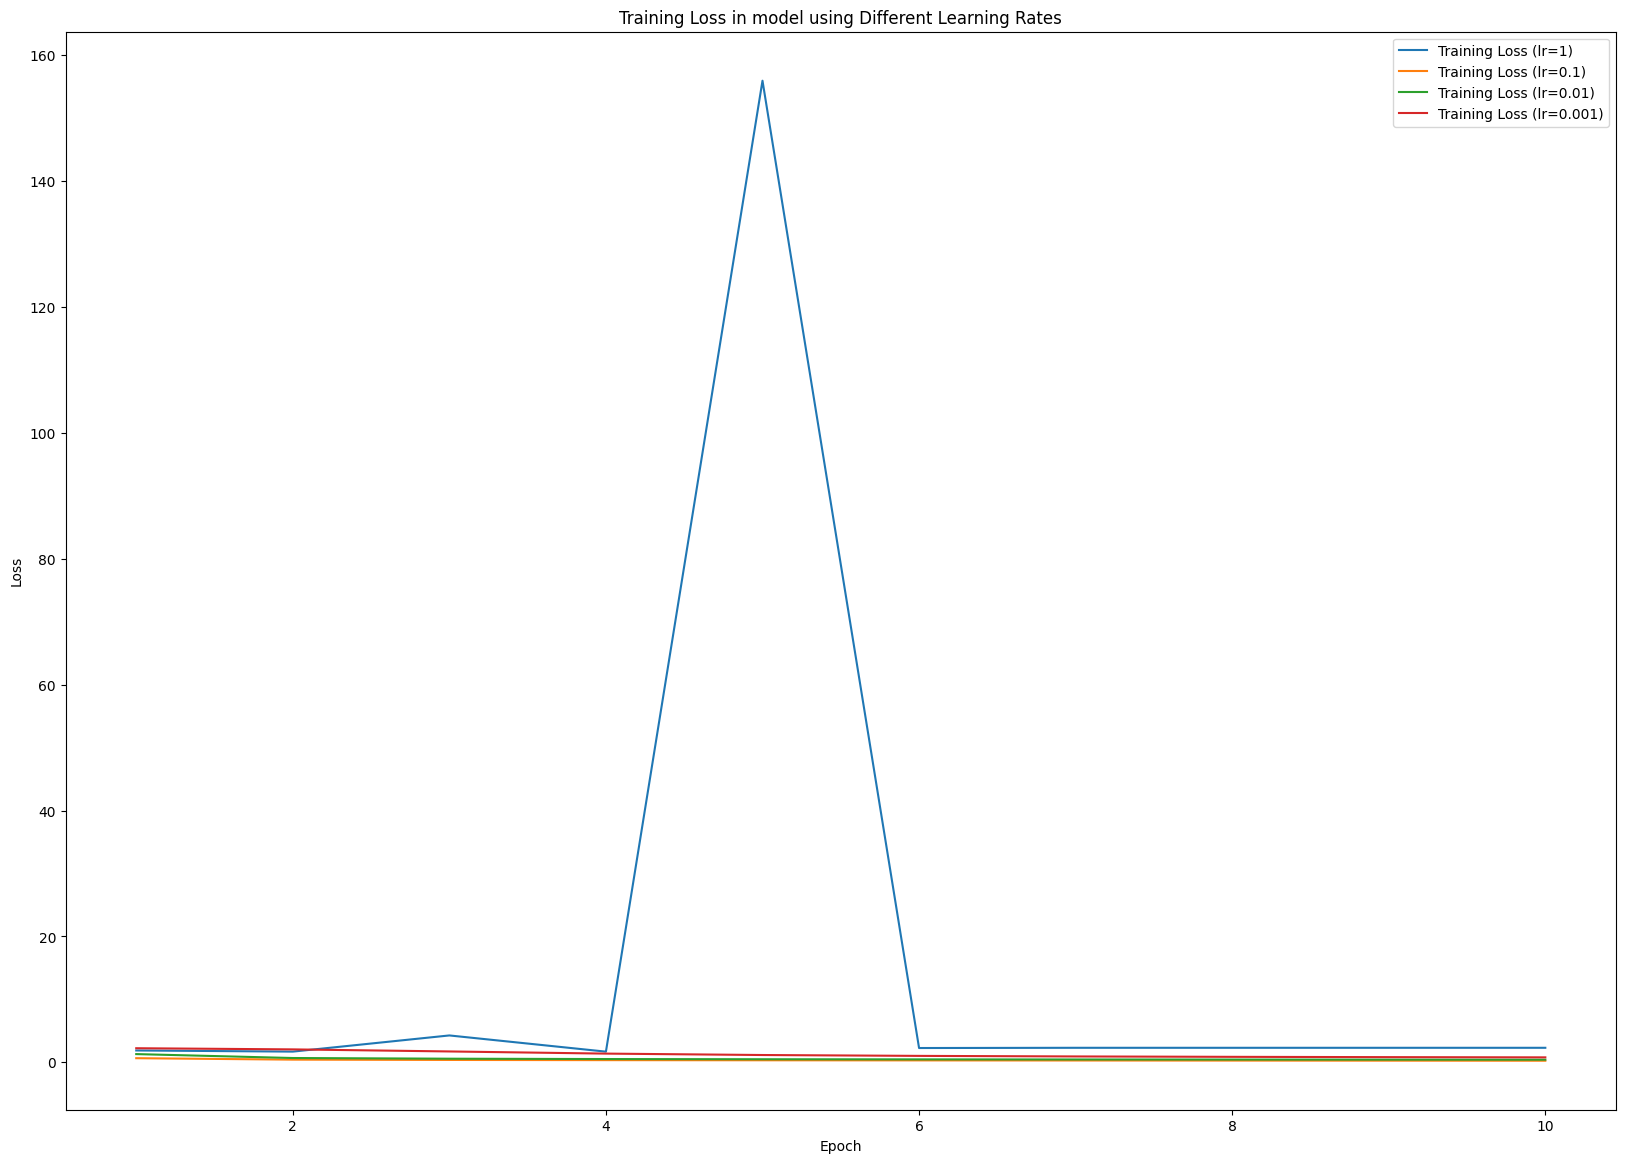

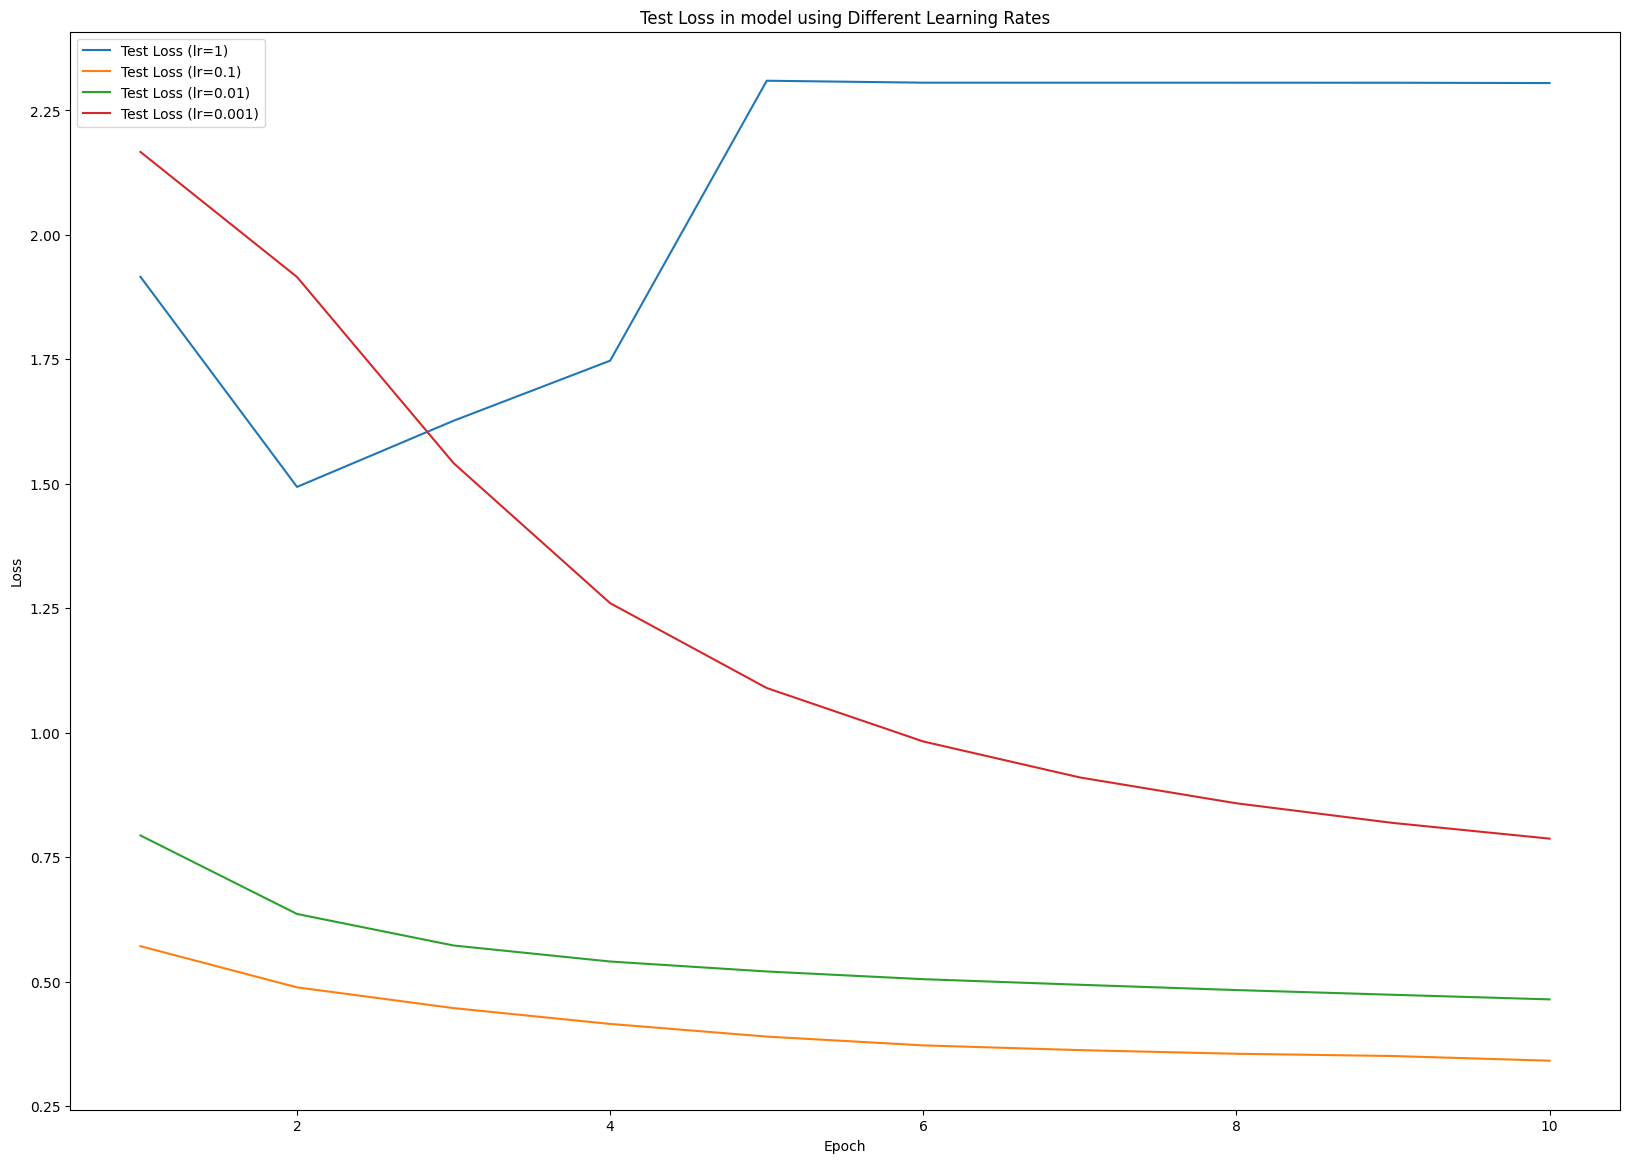

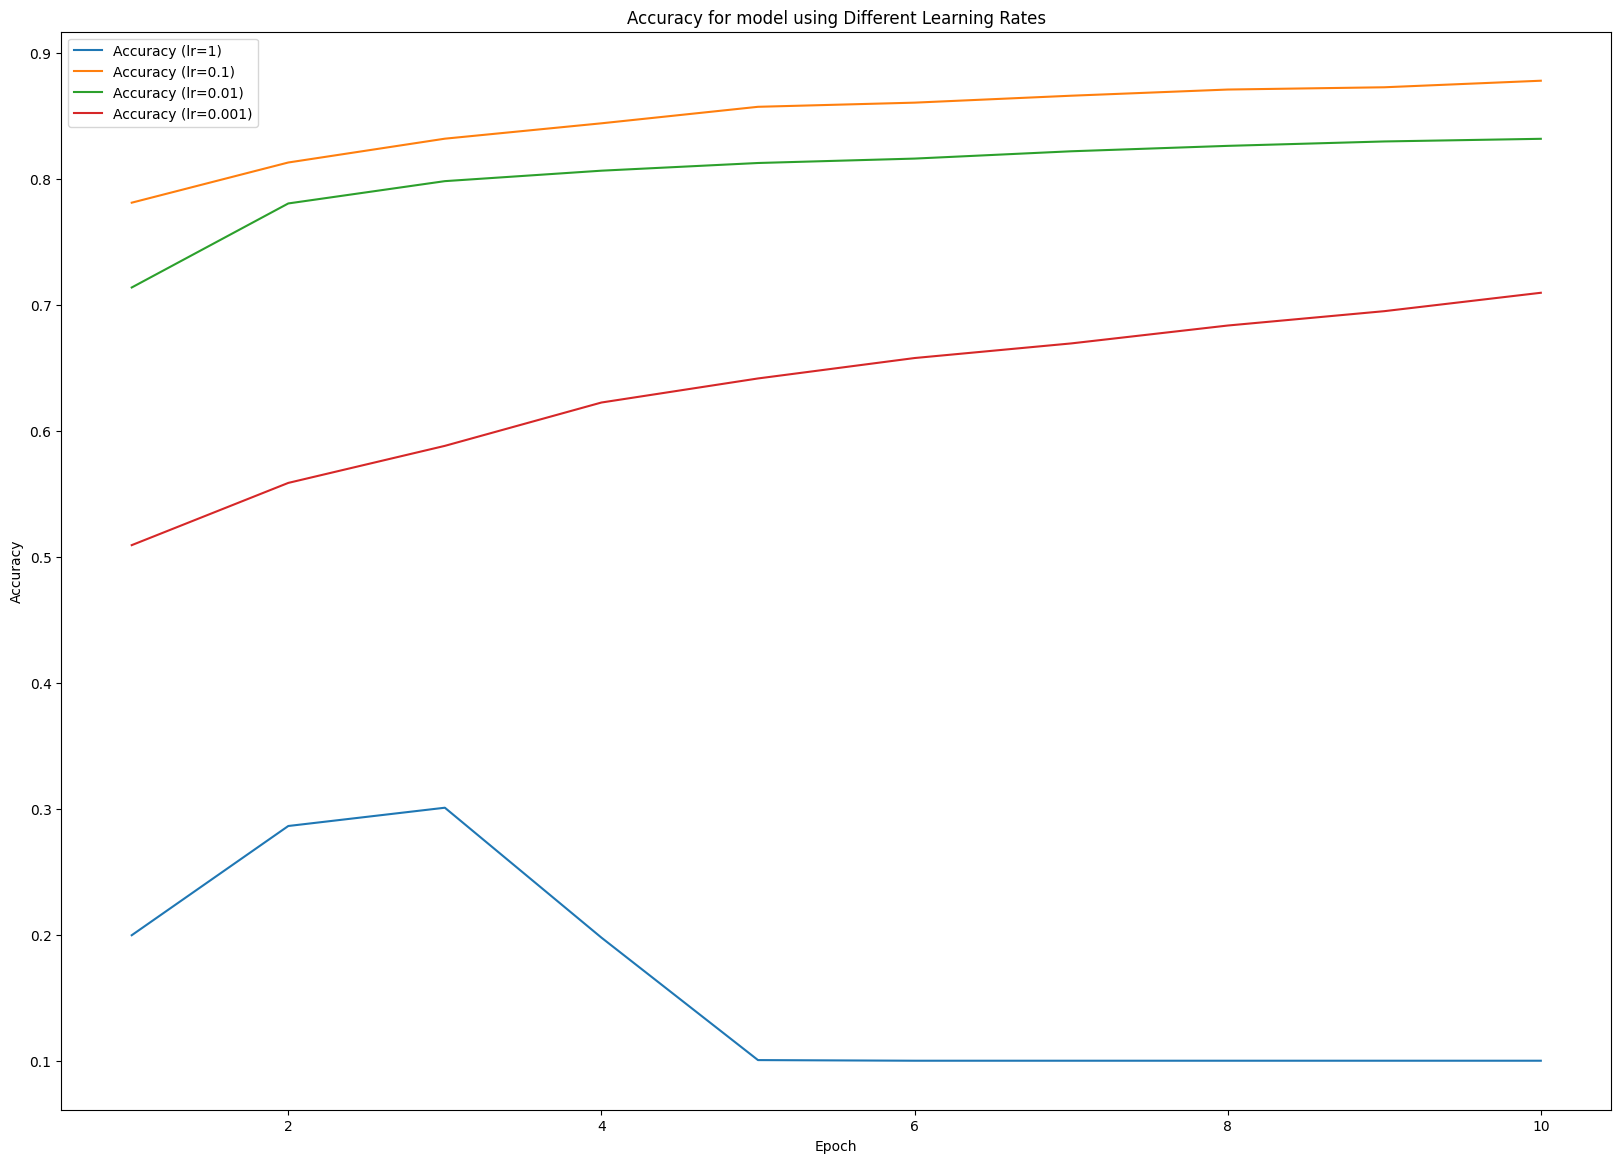

In [13]:
# Plot training loss for different learning rates
plt.figure(figsize=(20, 14))
for lr in learning_rates:
    train_losses = results[lr]['train_losses']
    plt.plot(range(1, len(train_losses) + 1), train_losses, label=f'Training Loss (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss in model using Different Learning Rates')
plt.legend()
plt.show()

# Plot test loss for different learning rates
plt.figure(figsize=(20, 14))
for lr in learning_rates:
    test_losses = results[lr]['test_losses']
    plt.plot(range(1, len(test_losses) + 1), test_losses, label=f'Test Loss (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss in model using Different Learning Rates')
plt.legend()
plt.show()

# Plot accuracy for different learning rates
plt.figure(figsize=(20, 14))
for lr in learning_rates:
    accuracies = results[lr]['accuracy_list']
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=f'Accuracy (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for model using Different Learning Rates')
plt.legend()
plt.show()

**Q1.3 (3 points)** 

Report the number of epochs when the accuracy reaches 85%. Fill in the table below and plot the loass curve for each experiment:

|Lr|Accuracy|Epoch|
|---|---|---|
|1   |      |     |
|0.1|          |    |
|0.01|         |    |
|0.001  |        |     |



In [13]:
def reaching_train_test_85(lr, patience=5, max_epochs=60):
    # Set the default random seed 42
    set_seed(42)

    print(f'Learning rate: {lr}\n{'-' * 30}')

    # Initialize variables
    train_losses = []
    test_losses = []
    accuracy_list = []

    best_epoch = 0
    
    # Initialize model and optimizer
    model = NeuralNetwork().to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    t = 0
    best_accuracy = 0
    epochs_no_improve = 0

    while t <= max_epochs:
        print(f"Epoch {t+1}\n{'-' * 30}")

        train_loss = train(train_dataloader, model, loss_fn, optimizer)
        test_loss, correct = test(test_dataloader, model, loss_fn)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracy_list.append(correct)

        if correct > best_accuracy:
            best_accuracy = correct
            best_epoch = t
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if correct >= 0.85:
            print(f"Accuracy reached 85% after {t} epochs: {correct:>5f}")
            break

        if epochs_no_improve >= patience:
            print(f"Early stopping after {t} epochs: no improvement for {patience} epochs")
            break

        t += 1

    if correct < 0.85:
        print(f"Stopped after {t-1} epochs without reaching 85% accuracy. Best accuracy: {best_accuracy:>6f}")

    print("Done!")

    return train_losses, test_losses, accuracy_list, best_epoch, best_accuracy

In [14]:
# Test different learning rate and save the result
learning_rates = [1, 0.1, 0.01, 0.001]
result_to_85 = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    train_losses, test_losses, accuracy_list, best_epoch, best_accuracy = reaching_train_test_85(lr)
    result_to_85[lr] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'accuracy_list': accuracy_list,
        'best_epoch': best_epoch,
        'best_accuracy': best_accuracy   
    }

Training with learning rate: 1
Learning rate: 1
------------------------------
Epoch 1
------------------------------
loss: 2.298730  [    0/60000]
loss: 2.078346  [ 6400/60000]
loss: 2.063327  [12800/60000]
loss: 1.884854  [19200/60000]
loss: 1.656733  [25600/60000]
loss: 1.679165  [32000/60000]
loss: 1.421637  [38400/60000]
loss: 1.532273  [44800/60000]
loss: 1.777356  [51200/60000]
loss: 1.685938  [57600/60000]
Average Train loss: 1.880750
Test Error: 
 Accuracy: 20.0%, Avg loss: 1.915828 

Epoch 2
------------------------------
loss: 1.966882  [    0/60000]
loss: 1.915499  [ 6400/60000]
loss: 1.766465  [12800/60000]
loss: 1.752323  [19200/60000]
loss: 1.623561  [25600/60000]
loss: 1.487857  [32000/60000]
loss: 1.413146  [38400/60000]
loss: 1.680380  [44800/60000]
loss: 1.637021  [51200/60000]
loss: 1.469961  [57600/60000]
Average Train loss: 1.699385
Test Error: 
 Accuracy: 28.6%, Avg loss: 1.493816 

Epoch 3
------------------------------
loss: 1.612844  [    0/60000]
loss: 1.6320

In [15]:
# Print the best accuracy and the best epoch
for lr in learning_rates:

    best_accuracy = result_to_85[lr]['best_accuracy']
    best_epoch = result_to_85[lr]['best_epoch']
    
    print(f"Learning rate {lr} - Best Accuracy: {round(best_accuracy *100, 4)}% achieved in epoch {best_epoch}")

Learning rate 1 - Best Accuracy: 30.08% achieved in epoch 2
Learning rate 0.1 - Best Accuracy: 85.71% achieved in epoch 4
Learning rate 0.01 - Best Accuracy: 85.19% achieved in epoch 16
Learning rate 0.001 - Best Accuracy: 83.14% achieved in epoch 60


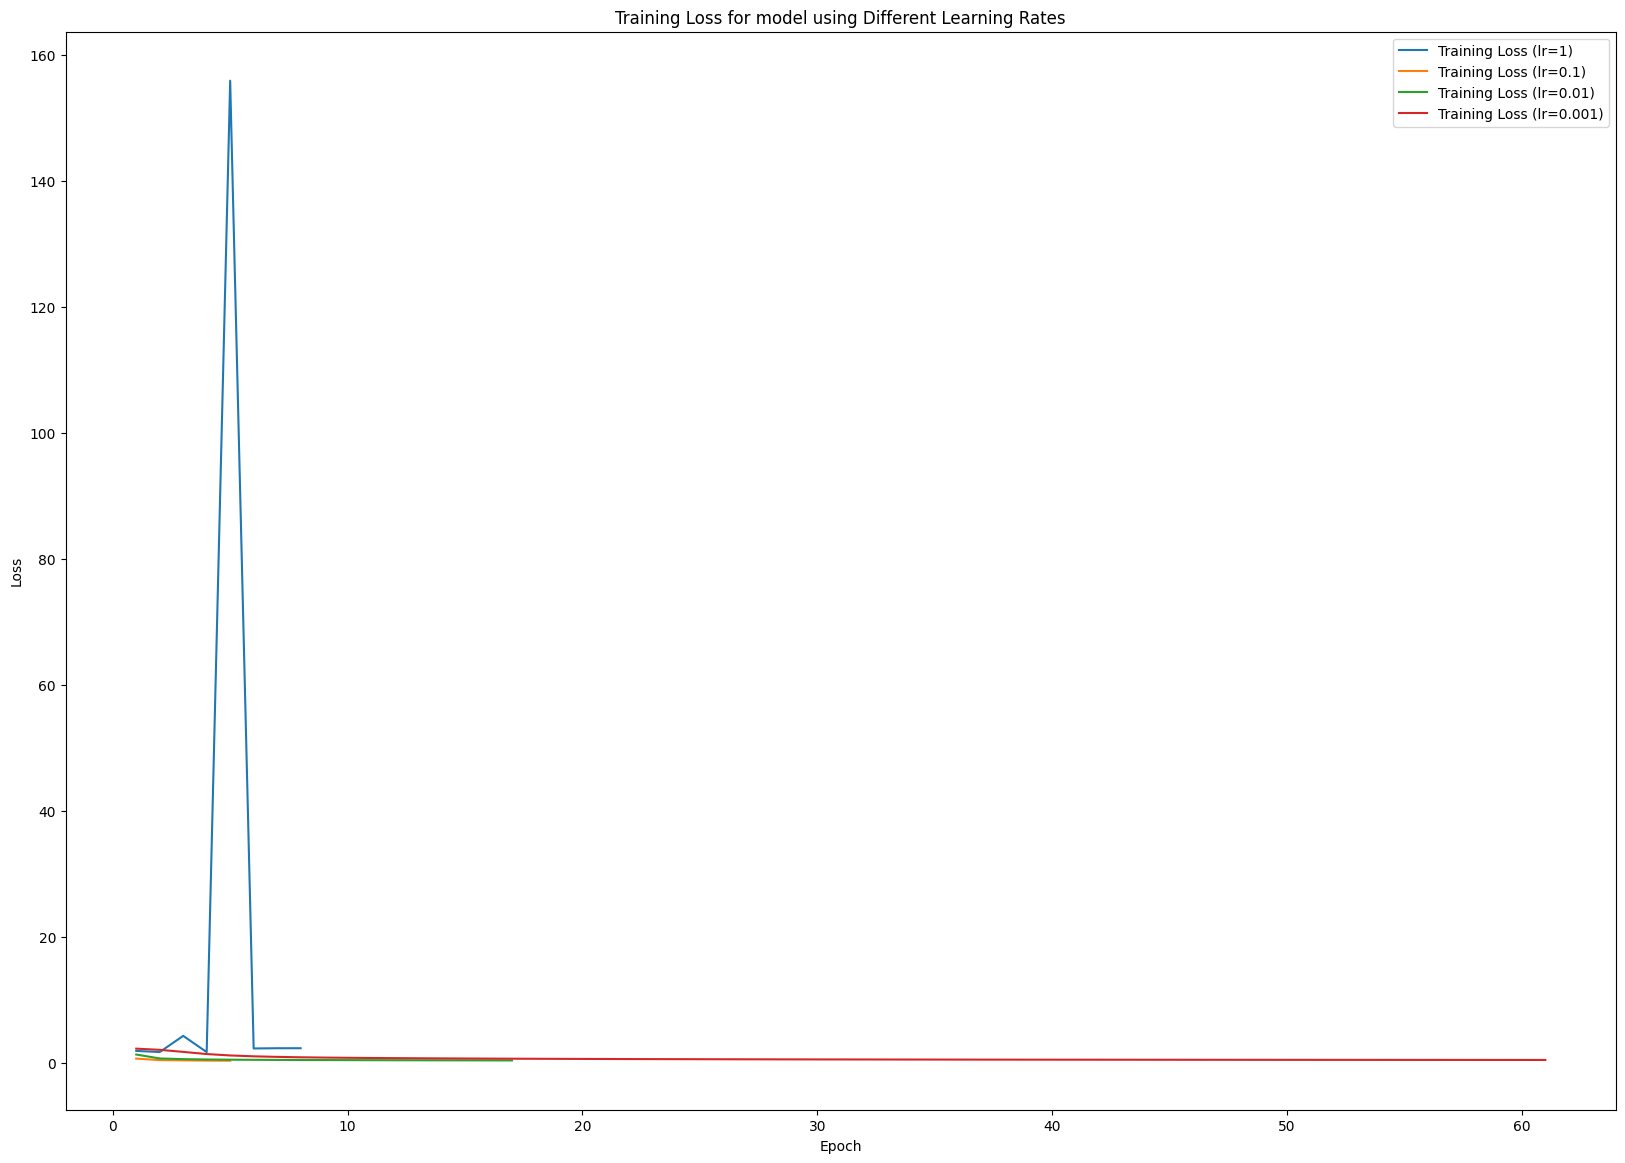

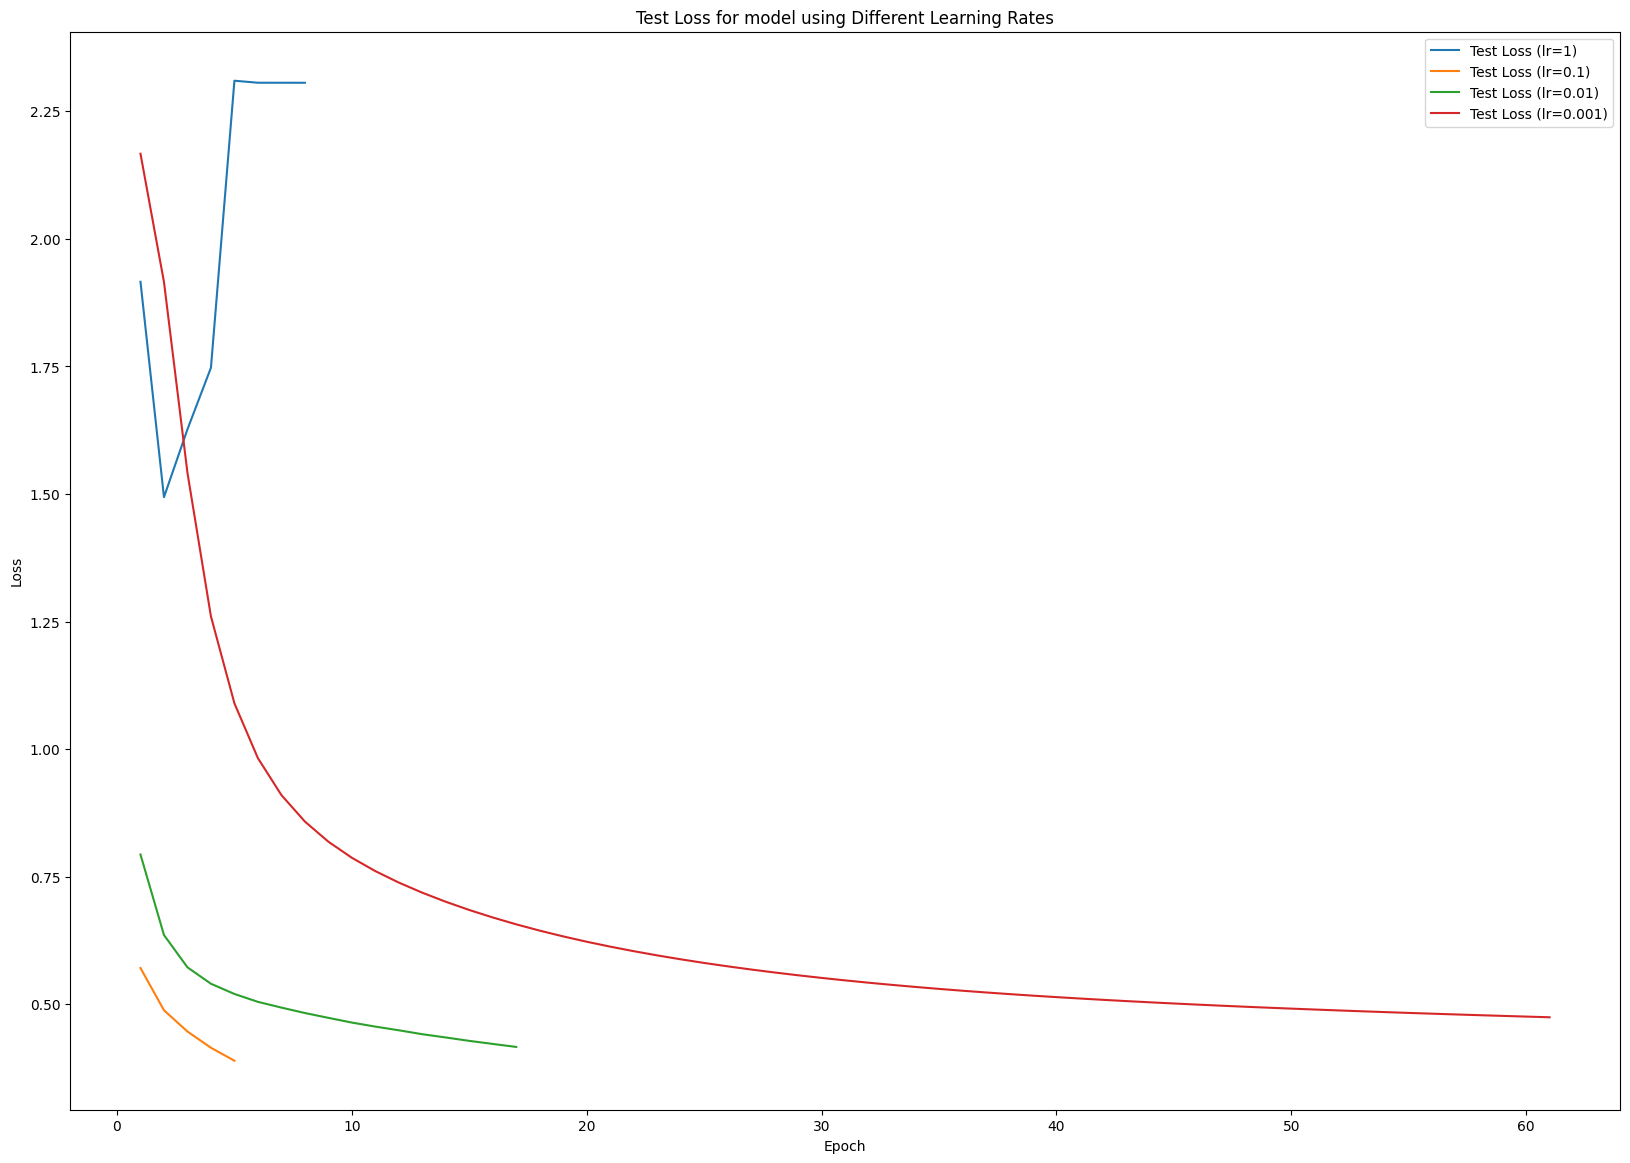

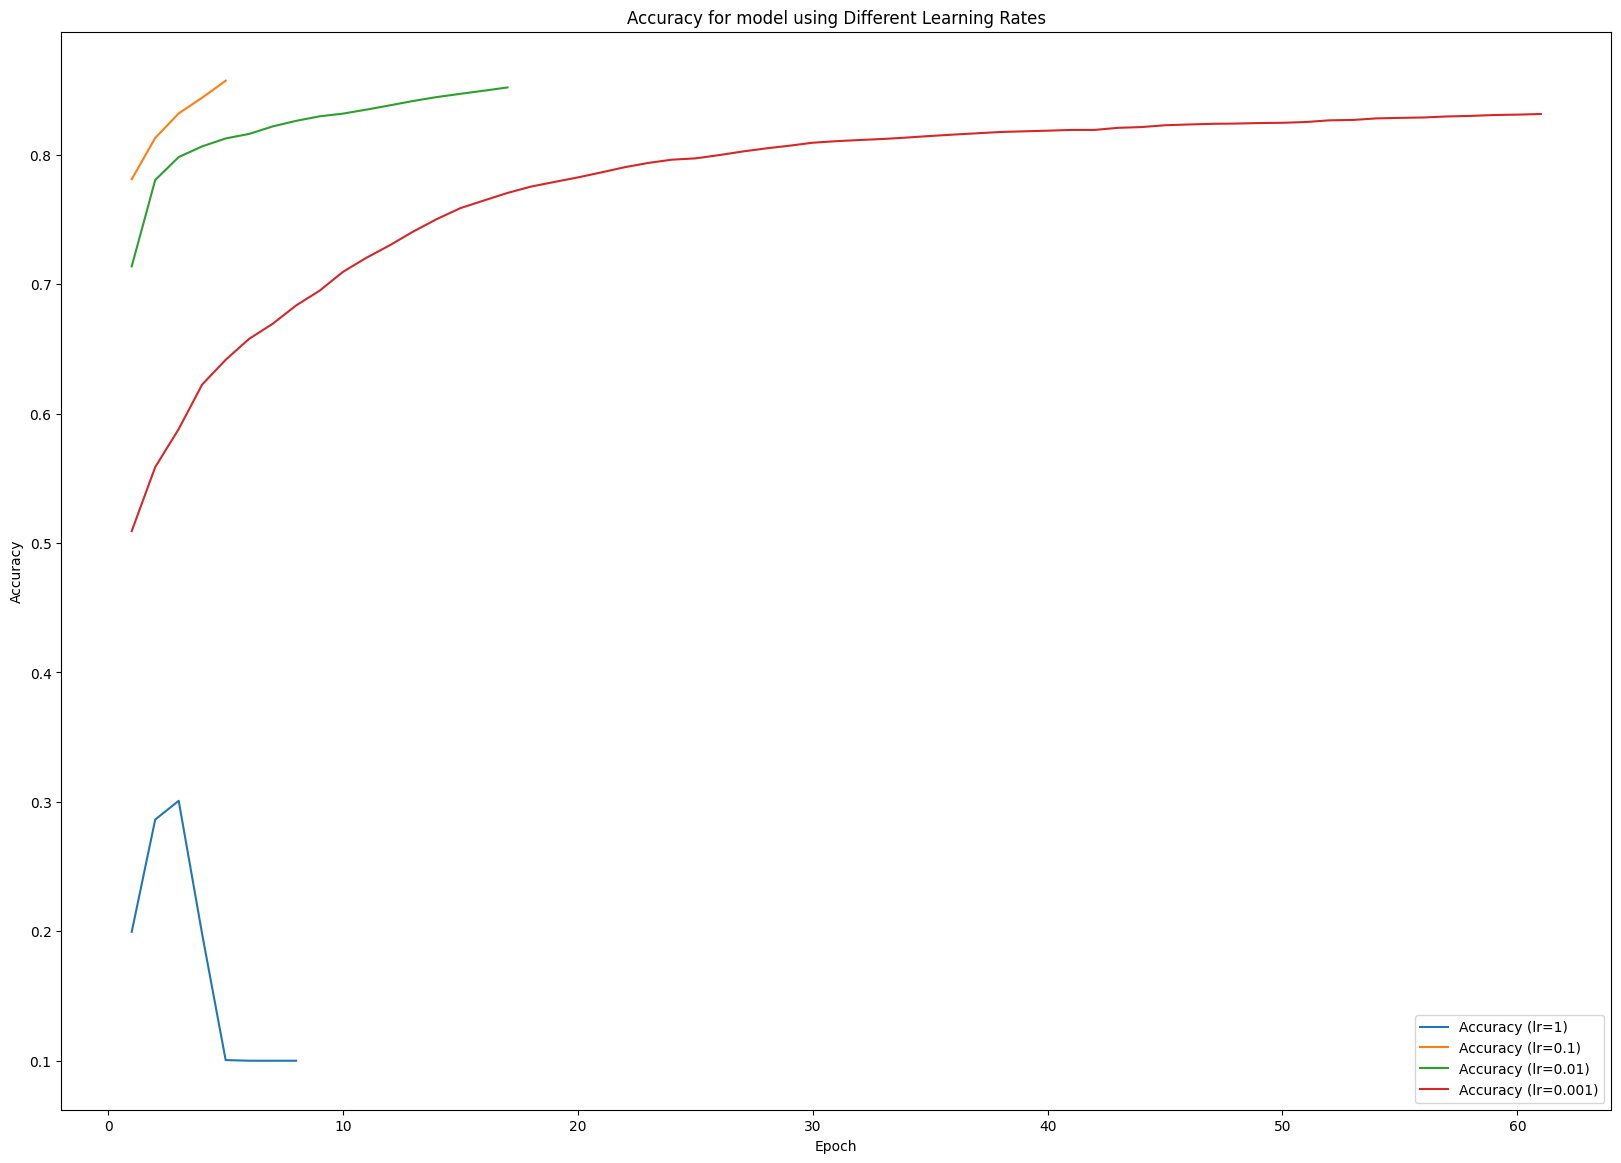

In [16]:
# Plot training loss for different learning rates
plt.figure(figsize=(20, 14))
for lr in learning_rates:
    train_losses = result_to_85[lr]['train_losses']
    plt.plot(range(1, len(train_losses) + 1), train_losses, label=f'Training Loss (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for model using Different Learning Rates')
plt.legend()
plt.show()

# Plot test loss for different learning rates
plt.figure(figsize=(20, 14))
for lr in learning_rates:
    test_losses = result_to_85[lr]['test_losses']
    plt.plot(range(1, len(test_losses) + 1), test_losses, label=f'Test Loss (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss for model using Different Learning Rates')
plt.legend()
plt.show()

# Plot accuracy for different learning rates
plt.figure(figsize=(20, 14))
for lr in learning_rates:
    accuracies = result_to_85[lr]['accuracy_list']
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=f'Accuracy (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for model using Different Learning Rates')
plt.legend()
plt.show()


**Q1.4 (2 points)** 

Compare the results in table 1 and table 2, what is your observation and your understanding of learning rate?

**Q1.5 (5 points)** 

Build a wider network by modifying the code that constructs the network so that the hidden layer(s) contain more perceptrons, and record the accuracy along with the number of trainable parameters in your model.  Now modify the oroginal network to be deeper instead of wider (i.e. by adding more hidden layers). Record your accuracy and network size findings. Plot the loss curve for each experiment. Write down your conclusions about changing the network structure?  

|Structures|Accuracy|Parameters|
|---|---|---|
|Base   |      ||
|Deeper|          ||
|Wider|         ||


In [18]:
# Wider model
class WiderNeuralNetwork(nn.Module):
    def __init__(self):
        super(WiderNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [19]:
# Deeper model
class DeeperNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeeperNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [20]:
# Count the number of tainable parameters
def number_of_trainable_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [21]:
def train_and_evaluate_structures(model, epochs=10):
    test_losses = []
    accuracy_list = []
    train_losses = []
    
        
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    parammeters = number_of_trainable_params(model)

    for t in range(epochs):
        print(f"Epoch {t+1}\n{'-' * 30}")

        train_loss = train(train_dataloader, model, loss_fn, optimizer)
        test_loss, correct = test(test_dataloader, model, loss_fn)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracy_list.append(correct)

    print(f"Accuracy after {epochs} epochs: {correct:>6f}")

    return train_losses, test_losses, accuracy_list, parammeters

In [22]:
# List of models to try
model_variants = [
    "Base Model",
    "Wider Model",
    "Deeper Model"
]

results_summary = {}

# Training loop for different models
for variant in model_variants:
    print(f"\nTraining with model variant: {variant}")
    set_seed(42)
    
    if variant == "Wider Model":
        current_model = WiderNeuralNetwork().to(device)
    elif variant == "Deeper Model":
        current_model = DeeperNeuralNetwork().to(device)
    else:
        current_model = NeuralNetwork().to(device)
    
    train_losses, test_losses, accuracy_list, params_count = train_and_evaluate_structures(current_model, epochs=15)
    
    results_summary[variant] = {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'accuracy_list': accuracy_list,
        'params_count': params_count
    }

# Display the results
for variant in model_variants:
    final_accuracy = results_summary[variant]['accuracy_list'][-1]
    total_params = results_summary[variant]['params_count']
    
    print(f"\nModel Variant: {variant}")
    print(f"Number of trainable parameters: {total_params}")
    print(f"Final Accuracy after 15 epochs: {final_accuracy * 100:.2f}%")



Training with model variant: Base Model
Epoch 1
------------------------------
loss: 2.298730  [    0/60000]
loss: 0.908623  [ 6400/60000]
loss: 0.580196  [12800/60000]
loss: 0.720629  [19200/60000]
loss: 0.614350  [25600/60000]
loss: 0.500302  [32000/60000]
loss: 0.540581  [38400/60000]
loss: 0.599433  [44800/60000]
loss: 0.616562  [51200/60000]
loss: 0.458594  [57600/60000]
Average Train loss: 0.654657
Test Error: 
 Accuracy: 78.1%, Avg loss: 0.571193 

Epoch 2
------------------------------
loss: 0.465054  [    0/60000]
loss: 0.442642  [ 6400/60000]
loss: 0.377082  [12800/60000]
loss: 0.440151  [19200/60000]
loss: 0.403445  [25600/60000]
loss: 0.436655  [32000/60000]
loss: 0.406358  [38400/60000]
loss: 0.507337  [44800/60000]
loss: 0.526519  [51200/60000]
loss: 0.432994  [57600/60000]
Average Train loss: 0.424438
Test Error: 
 Accuracy: 81.3%, Avg loss: 0.488511 

Epoch 3
------------------------------
loss: 0.358920  [    0/60000]
loss: 0.366159  [ 6400/60000]
loss: 0.310650  [128

In [23]:
# Display the results
for variant in model_variants:
    final_accuracy = results_summary[variant]['accuracy_list'][-1]
    total_params = results_summary[variant]['params_count']
    
    print(f"\nModel Variant: {variant}")
    print(f"Number of trainable parameters: {total_params}")
    print(f"Final Accuracy after 15 epochs: {final_accuracy * 100:.2f}%")


Model Variant: Base Model
Number of trainable parameters: 669706
Final Accuracy after 15 epochs: 88.12%

Model Variant: Wider Model
Number of trainable parameters: 1863690
Final Accuracy after 15 epochs: 87.53%

Model Variant: Deeper Model
Number of trainable parameters: 932362
Final Accuracy after 15 epochs: 87.02%


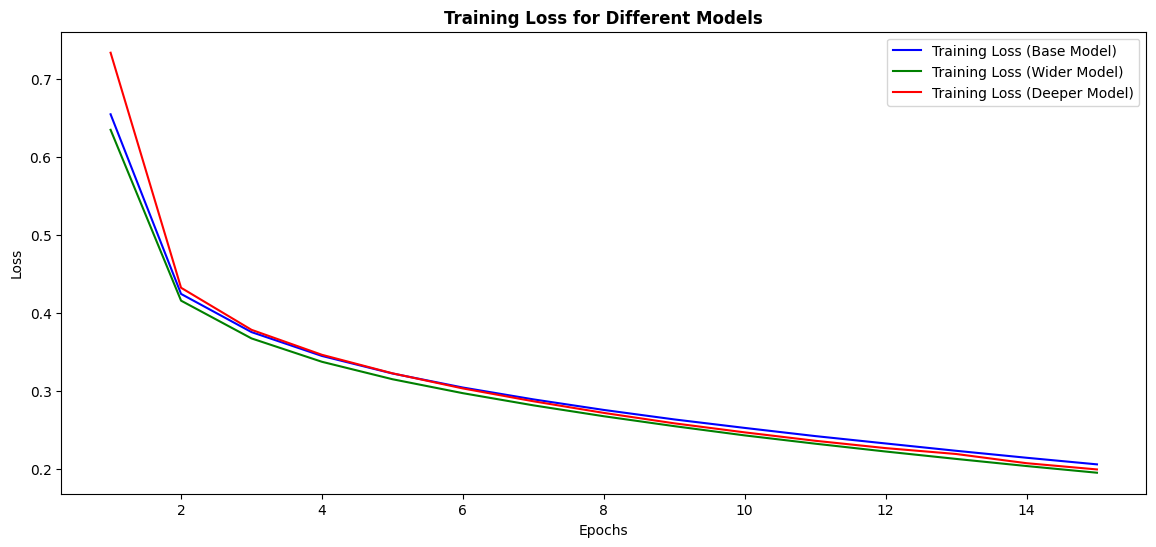

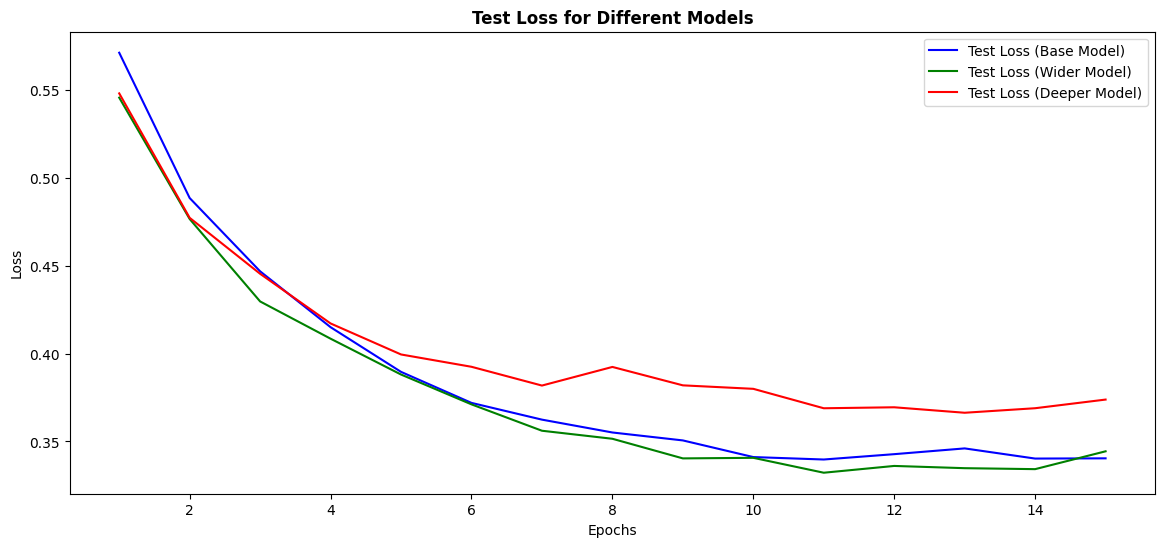

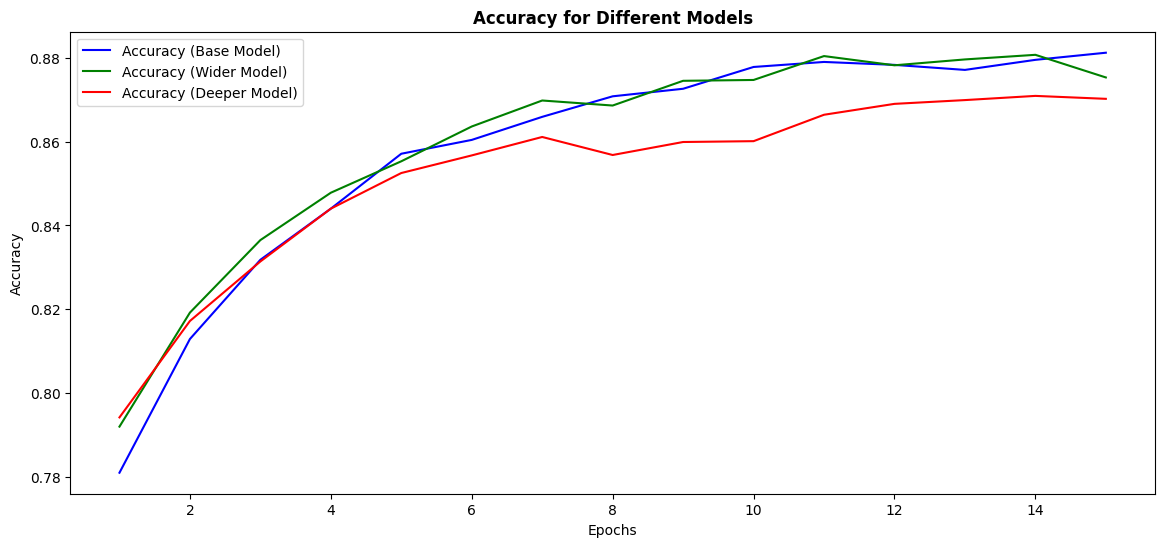

In [25]:
# Define distinct colors for each model
colors = ['blue', 'green', 'red']

# Plot training loss for different models
plt.figure(figsize=(14, 6))
for model_name, color in zip(model_variants, colors):
    train_losses = results_summary[model_name]['train_losses']
    plt.plot(range(1, len(train_losses) + 1), train_losses, label=f'Training Loss ({model_name})', color=color)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Models', fontweight='bold')
plt.legend()
plt.show()

# Plot test loss for different models
plt.figure(figsize=(14, 6))
for model_name, color in zip(model_variants, colors):
    test_losses = results_summary[model_name]['test_losses']
    plt.plot(range(1, len(test_losses) + 1), test_losses, label=f'Test Loss ({model_name})', color=color)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss for Different Models', fontweight='bold')
plt.legend()
plt.show()

# Plot accuracy for different models
plt.figure(figsize=(14, 6))
for model_name, color in zip(model_variants, colors):
    accuracy_list = results_summary[model_name]['accuracy_list']
    plt.plot(range(1, len(accuracy_list) + 1), accuracy_list, label=f'Accuracy ({model_name})', color=color)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models', fontweight='bold')
plt.legend()
plt.show()

**Q1.6 (2 points)** 

Calculate the mean of the gradients of the loss to all trainable parameters. Plot the gradients curve for the first 100 training steps. What are your observations? Note that this gradients will be saved with the training weight automatically after you call loss.backwards(). Hint: the mean of the gradients decrease.

For more exlanation of q1.7, you could refer to the following simple instructions: https://colab.research.google.com/drive/1XAsyNegGSvMf3_B6MrsXht7-fHqtJ7OW?usp=sharing


In [26]:
# set random seed
set_seed(42)

# Define the model and optimizer
model = NeuralNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Define loss function and optimizer

In [27]:
def train_with_gradient_tracking(dataloader, model, loss_fn, optimizer, max_steps=100):
    total_samples = len(dataloader.dataset)
    model.train()

    gradient_means = []
    
    for i, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass: compute predictions and loss
        predictions = model(inputs)
        loss = loss_fn(predictions, targets)

        # Backward pass: compute gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Compute mean gradient
        grad_sum = 0
        grad_count = 0
        for param in model.parameters():
            if param.grad is not None:
                grad_sum += param.grad.sum().item()
                grad_count += param.grad.numel()

        avg_gradient = grad_sum / grad_count if grad_count > 0 else 0
        gradient_means.append(avg_gradient)

        if i >= max_steps - 1:
            break

    return gradient_means


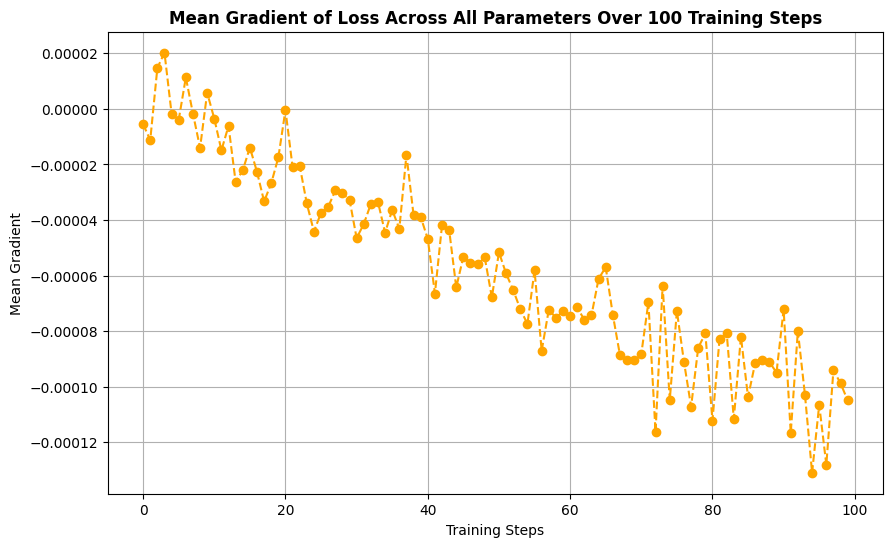

In [28]:
# Model training and gradients tracking
gradient_means = train_with_gradient_tracking(train_dataloader, model, loss_fn, optimizer, 100)


# Plot the mean gradients
plt.figure(figsize=(10, 6))
plt.plot(gradient_means, color='orange', linestyle='--', marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Mean Gradient')
plt.title('Mean Gradient of Loss Across All Parameters Over 100 Training Steps', fontweight='bold')
plt.grid(True)
plt.show()

**Q1.7 (5 points)** 

Modify the network structure and training/test to use a small convolutional neural network instead of an MLP. Discuss your findings with rehgard to convergence, accuracy and number of parameters, relative to MLPs.  

Hint: Look at the structure of the CNN in the Workshop 3 examples.

In [29]:
# Define a Convolutional Neural Network (CNN)
class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [30]:
# Function to train and evaluate a model with given learning rate and epochs
def run_experiment(lr=0.1, num_epochs=10):
    set_seed(42)
    cnn_model = ConvolutionalNN().to(device)
    optimizer = torch.optim.SGD(cnn_model.parameters(), lr=lr)
    train_losses, test_losses, accuracies = [], [], []
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}\n{'-' * 30}")
        train_loss = train(train_dataloader, cnn_model, loss_fn, optimizer)
        test_loss, correct = test(test_dataloader, cnn_model, loss_fn)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracies.append(correct)
    
    total_params = sum(p.numel() for p in cnn_model.parameters())
    print(f"CNN Model - Accuracy: {correct:.4f}, Total Parameters: {total_params}")
    return train_losses, test_losses, accuracies

In [31]:

num_epochs = 20

print("Training Convolutional Neural Network (CNN):")
cnn_train_losses, cnn_test_losses, cnn_accuracies = run_experiment(lr=0.1, num_epochs=num_epochs)
print("\nTraining Fully Connected Neural Network (FCNN):")
fcnn_train_losses, fcnn_test_losses, fcnn_accuracies = train_and_test(lr=0.1, epochs=num_epochs)

Training Convolutional Neural Network (CNN):
Epoch 1
------------------------------
loss: 2.304556  [    0/60000]
loss: 0.965051  [ 6400/60000]
loss: 0.635944  [12800/60000]
loss: 0.752549  [19200/60000]
loss: 0.613140  [25600/60000]
loss: 0.581077  [32000/60000]
loss: 0.502476  [38400/60000]
loss: 0.523866  [44800/60000]
loss: 0.645287  [51200/60000]
loss: 0.454058  [57600/60000]
Average Train loss: 0.688699
Test Error: 
 Accuracy: 79.5%, Avg loss: 0.523398 

Epoch 2
------------------------------
loss: 0.411013  [    0/60000]
loss: 0.426862  [ 6400/60000]
loss: 0.311340  [12800/60000]
loss: 0.454015  [19200/60000]
loss: 0.371598  [25600/60000]
loss: 0.427330  [32000/60000]
loss: 0.332584  [38400/60000]
loss: 0.442286  [44800/60000]
loss: 0.564446  [51200/60000]
loss: 0.364053  [57600/60000]
Average Train loss: 0.394739
Test Error: 
 Accuracy: 85.1%, Avg loss: 0.400945 

Epoch 3
------------------------------
loss: 0.237436  [    0/60000]
loss: 0.348992  [ 6400/60000]
loss: 0.260777  

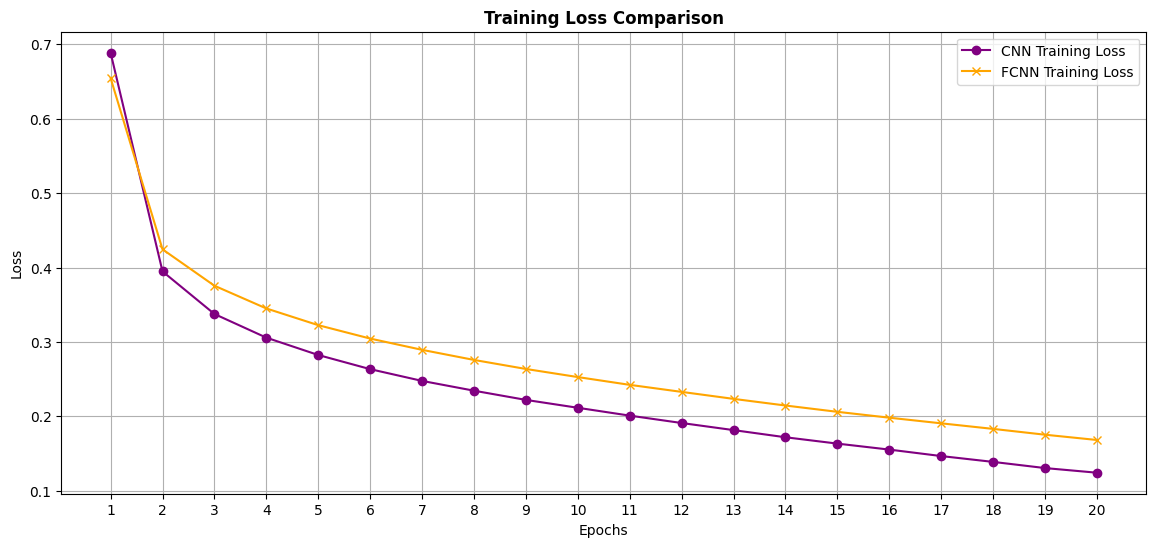

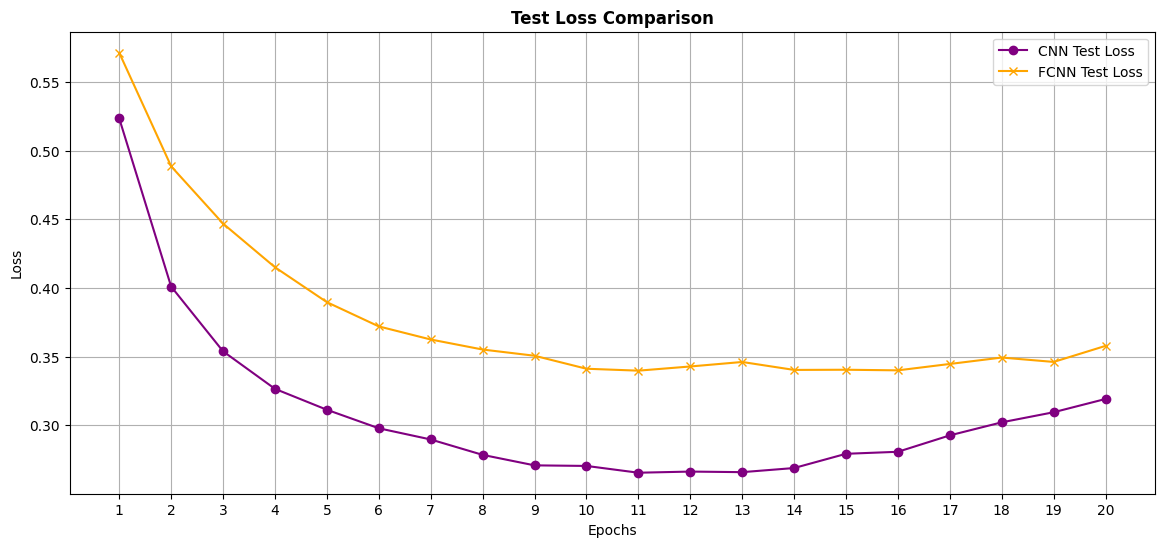

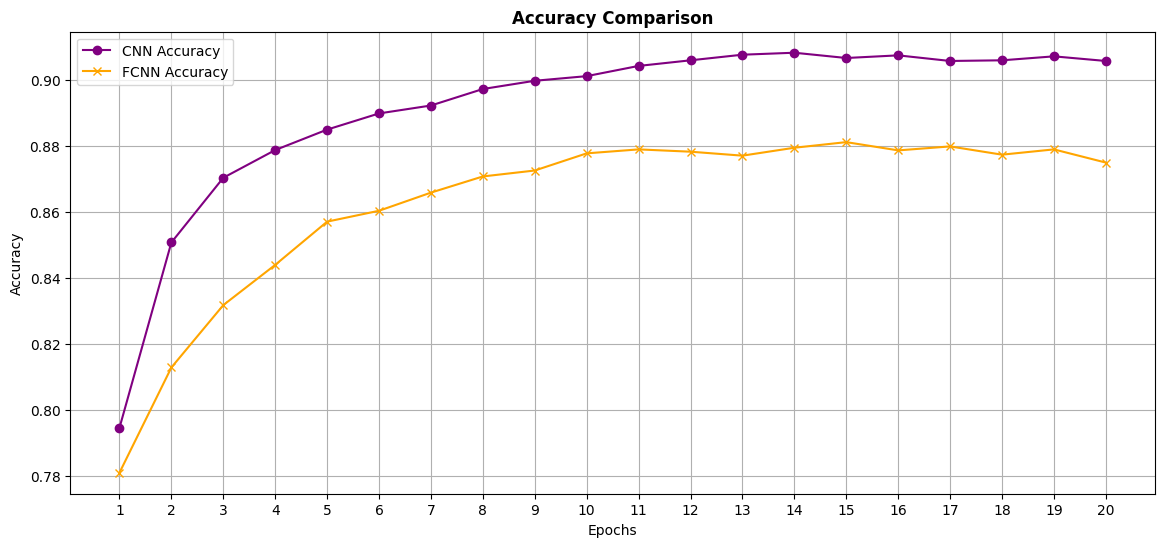

In [33]:
# Comparison plots
epochs_range = range(1, num_epochs + 1)

# Plot training loss comparison
plt.figure(figsize=(14, 6))
plt.plot(epochs_range, cnn_train_losses, label='CNN Training Loss', color='purple', linestyle='-', marker='o')
plt.plot(epochs_range, fcnn_train_losses, label='FCNN Training Loss', color='orange', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison', fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(epochs_range)

# Plot test loss comparison
plt.figure(figsize=(14, 6))
plt.plot(epochs_range, cnn_test_losses, label='CNN Test Loss', color='purple', linestyle='-', marker='o')
plt.plot(epochs_range, fcnn_test_losses, label='FCNN Test Loss', color='orange', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss Comparison', fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(epochs_range)

# Plot accuracy comparison
plt.figure(figsize=(14, 6))
plt.plot(epochs_range, cnn_accuracies, label='CNN Accuracy', color='purple', linestyle='-', marker='o')
plt.plot(epochs_range, fcnn_accuracies, label='FCNN Accuracy', color='orange', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison', fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(epochs_range)

plt.show()

In [34]:

# Print out performance details
cnn_model = ConvolutionalNN().to(device)
fcnn_model = NeuralNetwork().to(device)

print(f"Model: CNN, Trainable Parameters: {number_of_trainable_params(cnn_model)}")
print(f"Accuracy after {num_epochs} epochs: {round(cnn_accuracies[-1] * 100, 2)}%\n")

print(f"Model: FCNN, Trainable Parameters: {number_of_trainable_params(fcnn_model)}")
print(f"Accuracy after {num_epochs} epochs: {round(fcnn_accuracies[-1] * 100, 2)}%\n")

Model: CNN, Trainable Parameters: 105866
Accuracy after 20 epochs: 90.58%

Model: FCNN, Trainable Parameters: 669706
Accuracy after 20 epochs: 87.5%

